In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Dense,MaxPool2D,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
tensorflow.__version__

'2.8.2'

In [5]:
! git clone https://github.com/ki-ljl/cnn-dogs-vs-cats.git # we clone the data from ki-ljl KI Hungry And Humble git up!

Cloning into 'cnn-dogs-vs-cats'...
remote: Enumerating objects: 1479, done.
remote: Counting objects: 100% (1479/1479), done.
remote: Compressing objects: 100% (1456/1456), done.
remote: Total 1479 (delta 31), reused 1458 (delta 18), pack-reused 0
Receiving objects: 100% (1479/1479), 32.95 MiB | 28.24 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [7]:
img_with=64
img_height=64

In [8]:
train_generator=ImageDataGenerator(rescale=1/255)

In [9]:
file_train='/content/cnn-dogs-vs-cats/data/training_data'
train_data=train_generator.flow_from_directory(directory=file_train,target_size=(img_with,img_height),batch_size=32,class_mode='binary',
                                               seed=42)

Found 1000 images belonging to 2 classes.


In [10]:
file_test='/content/cnn-dogs-vs-cats/data/testing_data'
test_generator=train_generator.flow_from_directory(directory=file_test,target_size=(img_with,img_height),batch_size=32,class_mode='binary',
                                                 seed=42)


Found 400 images belonging to 2 classes.


In [11]:
model=tensorflow.keras.models.Sequential( [tensorflow.keras.layers.RandomFlip("horizontal"),tensorflow.keras.layers.RandomRotation(0.1)])

model.add(tensorflow.keras.layers.Conv2D(32,(3,3),input_shape=(img_with,img_height,3),activation='relu'))
model.add(tensorflow.keras.layers.MaxPool2D(2,2))

model.add(tensorflow.keras.layers.Conv2D(64,(3,3),input_shape=(img_with,img_height,3),activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.33))
model.add(tensorflow.keras.layers.MaxPool2D(2,2))

model.add(tensorflow.keras.layers.Flatten())

model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.33))

model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.33))

model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.33))

model.add(tensorflow.keras.layers.Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],)  # compile the model

In [13]:
model.fit(train_data,validation_data=test_generator,epochs=100,batch_size=32)

Epoch 1/100
32/32 [==============================] - 7s 200ms/step - loss: 0.7025 - accuracy: 0.5110 - val_loss: 0.6926 - val_accuracy: 0.5425
Epoch 2/100
32/32 [==============================] - 6s 193ms/step - loss: 0.6945 - accuracy: 0.5310 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 7s 221ms/step - loss: 0.6928 - accuracy: 0.5100 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 6s 190ms/step - loss: 0.6936 - accuracy: 0.5130 - val_loss: 0.6888 - val_accuracy: 0.5250
Epoch 5/100
32/32 [==============================] - 6s 190ms/step - loss: 0.6885 - accuracy: 0.5550 - val_loss: 0.6930 - val_accuracy: 0.5075
Epoch 6/100
32/32 [==============================] - 6s 190ms/step - loss: 0.6953 - accuracy: 0.4870 - val_loss: 0.6923 - val_accuracy: 0.5075
Epoch 7/100
32/32 [==============================] - 6s 190ms/step - loss: 0.6906 - accuracy: 0.5180 - val_loss: 0.6914 - val_accuracy: 0.5000

In [14]:
model.save('dog.h5')

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [158]:
test=image.load_img('/content/temoignage-mon-chat-est-des-plus-gros-monde-prend-pour-chien.jpeg',target_size=(64,64)) ## test image from google

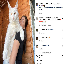

In [159]:
test

In [160]:
test=image.img_to_array(test)

In [161]:
test.shape

(64, 64, 3)

In [162]:
test=np.expand_dims(test,axis=0)

In [163]:
pred=model.predict(test/255)

In [168]:
pred

array([[0.3800282]], dtype=float32)

In [169]:
score = pred
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score))

This image is 62.00 percent cat and 38.00 percent dog.


In [27]:
import os

In [103]:
list_chat=os.listdir('/content/cnn-dogs-vs-cats/data/testing_data/cats')

In [171]:
loss=pd.DataFrame(model.history.history)
 